In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

import tdgl
from tdgl.geometry import box, circle, close_curve

SAVE = False

In [2]:
polygon = tdgl.Polygon(points=circle(10))
mesh = polygon.make_mesh(max_edge_length=1.5, smooth=100)

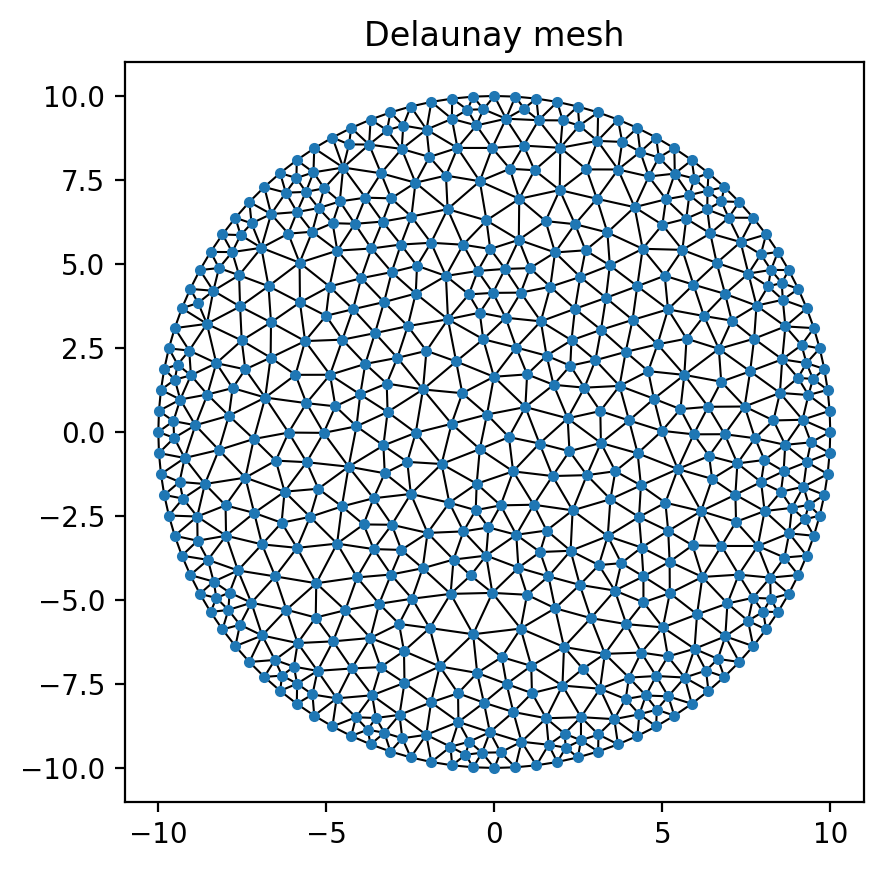

In [3]:
ax = mesh.plot(show_edges=True, show_dual_edges=False)
_ = ax.set_title("Delaunay mesh")

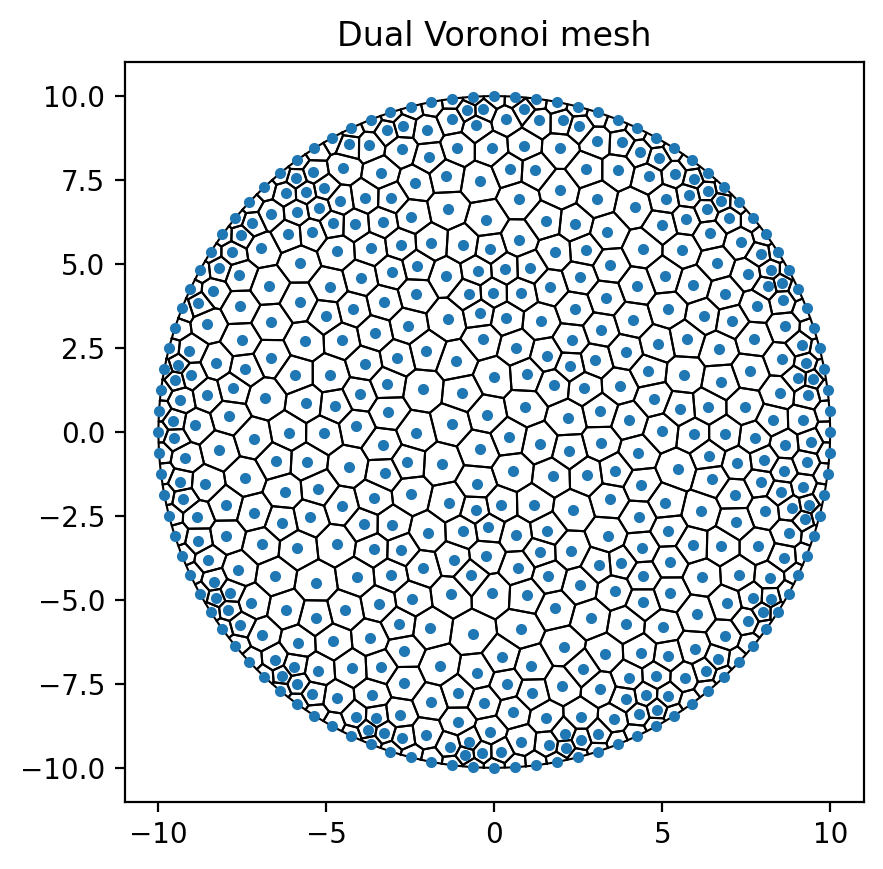

In [4]:
ax = mesh.plot()
_ = ax.set_title("Dual Voronoi mesh")

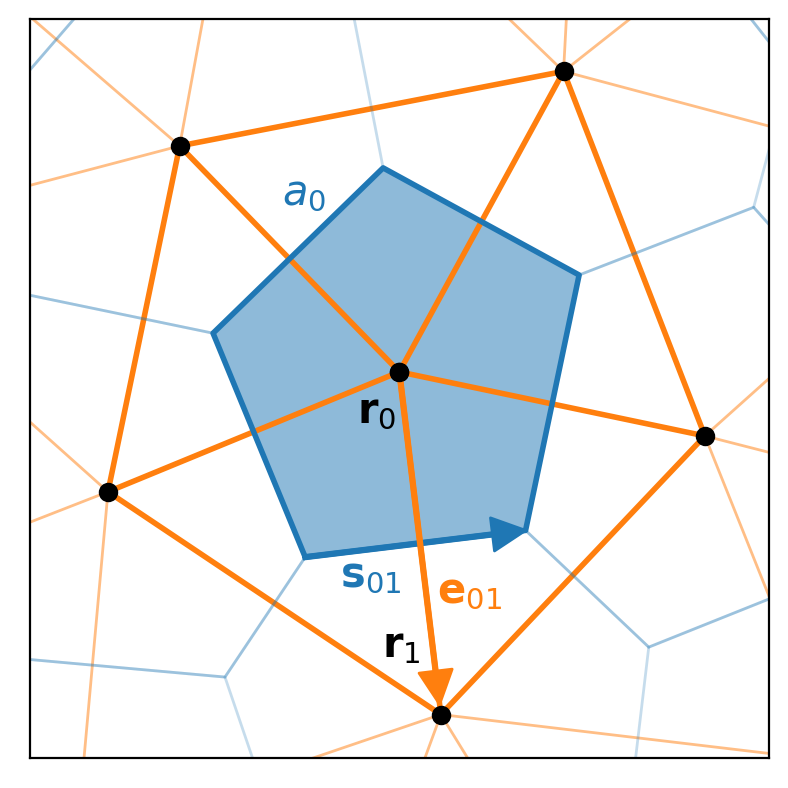

In [5]:
plt.rcParams["font.size"] = 15

sites = mesh.sites
dual_sites = mesh.dual_sites
fig, ax = plt.subplots()
ax.set_aspect("equal")

i0 = mesh.closest_site((0, 0))
r0 = x0, y0 = sites[i0]
polygon = close_curve(mesh.voronoi_polygons[i0])
path = mpl.path.Path(polygon)
patch = mpl.patches.PathPatch(path, color="C0", alpha=0.5, ec="none")
ax.add_artist(patch)

ax.plot(*polygon.T, "C0-", lw=2)
for p in mesh.voronoi_polygons:
    ax.plot(*p.T, "C0-", lw=1, alpha=0.25)
    
ax.plot(mesh.x, mesh.y, "ko")
ax.triplot(mesh.x, mesh.y, mesh.elements, "C1-", lw=1, alpha=0.5)
ax.triplot(mesh.x, mesh.y, [tri for tri in mesh.elements if i0 in tri], "C1-", lw=2)

edges = [sorted(e, key=lambda i: i == i0) for e in mesh.edge_mesh.edges if i0 in e]

m = 1.1
ax.set_xlim(x0-m, x0+m)
ax.set_ylim(y0-m-0.05, y0+m-0.05)
ax.set_xticks([])
ax.set_yticks([])

offsets = [(-0.125, -0.15), (-0.175, 0.175), (0, 0.125)]
edges = [(i0, 445), (445, 499), (499, i0)]

for i, (e, ofs) in enumerate(zip(edges[:2], offsets * 4)):
    ax.text(
        *(sites[e[0]] + ofs),
        f"$\\mathbf{{r}}_{{{i}}}$",
    )

e = edges[0]
ax.annotate(
    "",
    xy=sites[e[1]],
    xytext=sites[e[0]],
    zorder=100,
    arrowprops=dict(width=1.25, ec="C1", fc="C1", shrink=0.03),
)
r01 = sites[list(e)].mean(axis=0)
ax.text(*(r01 + (0.05, -0.175)), "$\\mathbf{e}_{01}$", color="C1")

ax.text(*(r0 + (-0.35, 0.5)), "$a_0$", color="C0")

s01 = [905, 837]
ax.annotate(
    "",
    xy=dual_sites[s01[1]],
    xytext=dual_sites[s01[0]],
    zorder=90,
    arrowprops=dict(width=1.25, ec="C0", fc="C0", shrink=0),
)
ax.text(*(dual_sites[s01].mean(axis=0) + (-0.225, -0.125)), "$\\mathbf{s}_{01}$", color="C0")

ax.plot(x0, y0, "ko", zorder=110)

if SAVE:
    fig.savefig("../images/voronoi.pdf", bbox_inches="tight")
    fig.savefig("../images/voronoi.png", bbox_inches="tight", dpi=300)